In [1]:
import numpy as np
import torch
import os
import matplotlib.pyplot as plt
import random

In [2]:
def getMyEmb(original_emb):
    
    tmp = torch.FloatTensor(original_emb)
    tmp = torch.mean(tmp, dim=0)
    tmp = torch.nn.functional.normalize(tmp, p=2, dim=0)
    
    return tmp

In [3]:
DA_LIST = 'data/testset_distribution_list.txt'
DA_LIST2 = 'data/testset_test_list.txt'
DA_PATH_ORIGINAL = '../vox_emb/test'
# DA_PATH_PROCESSED = 'exp_emb/MyLinearNetv2_Exp4-2/emb_test'
DA_PATH_PROCESSED = 'exp_emb/MyLinearNetv2_Exp5-3/emb_test'
# DA_PATH_PROCESSED = 'exp_emb/MyLinearNetv2_Exp6-2/emb_test'

# DA_LIST = 'data/trainset_distribution_list.txt'
# DA_LIST2 = 'data/trainset_test_list.txt'
# DA_PATH_ORIGINAL = '../vox_emb/train'
# DA_PATH_PROCESSED = 'exp_emb/MyLinearNetv2_Exp4-2/emb_train'

with open(DA_LIST) as f:
    lines = f.readlines()
    
with open(DA_LIST2) as f2:
    lines2 = f2.readlines()

# # IF TRAIN SET -> USE SMALL AMOUNT
# tmp_lines1 = lines[0:len(lines)//2]
# tmp_lines2 = lines[len(lines)//2:]
# tmp_lines1 = random.sample(tmp_lines1, len(tmp_lines1)//100)
# tmp_lines2 = random.sample(tmp_lines2, len(tmp_lines2)//100)
# lines = list()
# lines.extend(tmp_lines1)
# lines.extend(tmp_lines2)
# tmp_lines1 = lines2[0:len(lines2)//2]
# tmp_lines2 = lines2[len(lines2)//2:]
# tmp_lines1 = random.sample(tmp_lines1, len(tmp_lines1)//100)
# tmp_lines2 = random.sample(tmp_lines2, len(tmp_lines2)//100)
# lines2 = list()
# lines2.extend(tmp_lines1)
# lines2.extend(tmp_lines2)


same_cat_dist_original = []
diff_cat_dist_original = []
diff_spk_dist_original = []

same_cat_dist_processed = []
diff_cat_dist_processed = []
diff_spk_dist_processed = []

for idx, l in enumerate(lines):
    tokens = l.strip().split()
    flag = tokens[3]
    file1 = tokens[1]
    file2 = tokens[2]
    
    emb1 = np.load(os.path.join(DA_PATH_ORIGINAL, file1))
    emb2 = np.load(os.path.join(DA_PATH_ORIGINAL, file2))
    emb3 = np.load(os.path.join(DA_PATH_PROCESSED, file1))
    emb4 = np.load(os.path.join(DA_PATH_PROCESSED, file2))    
    emb1 = getMyEmb(emb1)
    emb2 = getMyEmb(emb2)
    emb3 = torch.FloatTensor(emb3)
    emb4 = torch.FloatTensor(emb4)
    
    # print(torch.norm(emb1), torch.norm(emb2), torch.norm(emb3), torch.norm(emb4))
    
    # # L2 distance
    # dist_original = torch.dist(emb1, emb2).item()
    # dist_processed = torch.dist(emb3, emb4).item()
    
    # cosine simliarity
    dist_original = 1 - torch.nn.functional.cosine_similarity(emb1, emb2, dim=0).item()
    dist_processed = 1 - torch.nn.functional.cosine_similarity(emb3, emb4, dim=0).item()
    
    if flag == '1':
        same_cat_dist_original.append(dist_original)
        same_cat_dist_processed.append(dist_processed)
    else:
        diff_cat_dist_original.append(dist_original)
        diff_cat_dist_processed.append(dist_processed)
    
    print('\r({}/{})'.format(idx+1, len(lines)), end='')

print()

lines2 = lines2[1::2]
lines2 = random.sample(lines2, len(lines)//2)

for idx, l in enumerate(lines2):
    tokens = l.strip().split()
    flag = tokens[0]
    file1 = tokens[1]
    file2 = tokens[2]
    
    if flag == '1':
        continue
    
    emb1 = np.load(os.path.join(DA_PATH_ORIGINAL, file1))
    emb2 = np.load(os.path.join(DA_PATH_ORIGINAL, file2))
    emb3 = np.load(os.path.join(DA_PATH_PROCESSED, file1))
    emb4 = np.load(os.path.join(DA_PATH_PROCESSED, file2))    
    emb1 = getMyEmb(emb1)
    emb2 = getMyEmb(emb2)
    emb3 = torch.FloatTensor(emb3)
    emb4 = torch.FloatTensor(emb4)
    # print(torch.norm(emb1), torch.norm(emb2), torch.norm(emb3), torch.norm(emb4))
    
    # # L2 distance
    # dist_original = torch.dist(emb1, emb2).item()
    # dist_processed = torch.dist(emb3, emb4).item()
    
    # cosine simliarity
    dist_original = 1 - torch.nn.functional.cosine_similarity(emb1, emb2, dim=0).item()
    dist_processed = 1 - torch.nn.functional.cosine_similarity(emb3, emb4, dim=0).item()
    
    diff_spk_dist_original.append(dist_original)
    diff_spk_dist_processed.append(dist_processed)
    
    print('\r({}/{})'.format(idx+1, len(lines2)), end='')

# diff_spk_dist_original = random.sample(diff_spk_dist_original, len(diff_cat_dist_original))
# diff_spk_dist_processed = random.sample(diff_spk_dist_processed, len(diff_cat_dist_processed))
print()

(4494/4494)
(2247/2247)


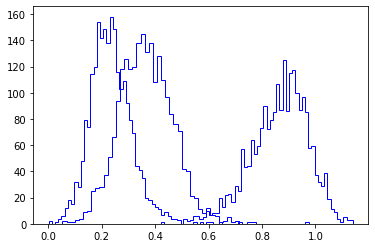

In [4]:
# plt.hist(same_cat_dist_original, bins=60, histtype='stepfilled', color='blue', alpha=0.5)
# plt.hist(diff_cat_dist_original, bins=60, histtype='stepfilled', color='blue', alpha=0.5)
# plt.hist(diff_spk_dist_original, bins=60, histtype='stepfilled', color='blue', alpha=0.5)

# plt.hist(same_cat_dist_processed, bins=60, histtype='stepfilled', color='red', alpha=0.5)
# plt.hist(diff_cat_dist_processed, bins=60, histtype='stepfilled', color='red', alpha=0.5)
# plt.hist(diff_spk_dist_processed, bins=60, histtype='stepfilled', color='red', alpha=0.5)


plt.hist(same_cat_dist_original, bins=60, histtype='step', color='blue')
plt.hist(diff_cat_dist_original, bins=60, histtype='step', color='blue')
plt.hist(diff_spk_dist_original, bins=60, histtype='step', color='red')

# plt.hist(same_cat_dist_processed, bins=60, histtype='step', color='red')
# plt.hist(diff_cat_dist_processed, bins=60, histtype='step', color='red')
# plt.hist(diff_spk_dist_processed, bins=60, histtype='step', color='red')


plt.show()

In [ ]:
DA_LIST = 'data/testset_distribution_list.txt'
DA_LIST2 = 'data/testset_test_list.txt'
DA_PATH_P1 = 'exp_emb/MyLinearNetv2_Exp5-3/emb_test'
DA_PATH_P2 = 'exp_emb/MyLinearNetv2_Exp6-1/emb_test'

# DA_LIST = 'data/trainset_distribution_list.txt'
# DA_PATH_P1 = '../vox_emb/train'
# DA_PATH_P2 = 'exp_emb/MyLinearNetv2_Exp6-2/emb_train'

with open(DA_LIST) as f:
    lines = f.readlines()
    
with open(DA_LIST2) as f2:
    lines2 = f2.readlines()

# # IF TRAIN SET -> USE SMALL AMOUNT
# lines1 = lines[0:len(lines)//2]
# lines2 = lines[len(lines)//2:]
# tmp_lines1 = random.sample(lines1, len(lines1)//100)
# tmp_lines2 = random.sample(lines2, len(lines2)//100)
# lines = list()
# lines.extend(tmp_lines1)
# lines.extend(tmp_lines2)


same_cat_dist_P1 = []
diff_cat_dist_P1 = []
diff_spk_dist_P1 = []

same_cat_dist_P2 = []
diff_cat_dist_P2 = []
diff_spk_dist_P2 = []

for idx, l in enumerate(lines):
    tokens = l.strip().split()
    flag = tokens[3]
    file1 = tokens[1]
    file2 = tokens[2]
    
    emb1 = np.load(os.path.join(DA_PATH_P1, file1))
    emb2 = np.load(os.path.join(DA_PATH_P1, file2))
    emb3 = np.load(os.path.join(DA_PATH_P2, file1))
    emb4 = np.load(os.path.join(DA_PATH_P2, file2))    
    emb1 = getMyEmb(emb1)
    emb2 = getMyEmb(emb2)
    emb3 = torch.FloatTensor(emb3)
    emb4 = torch.FloatTensor(emb4)
    
    # # L2 distance
    # dist_P1 = torch.dist(emb1, emb2).item()
    # dist_P2 = torch.dist(emb3, emb4).item()
    
    # cosine simliarity
    dist_P1 = 1 - torch.nn.functional.cosine_similarity(emb1, emb2, dim=0).item()
    dist_P2 = 1 - torch.nn.functional.cosine_similarity(emb3, emb4, dim=0).item()
    
    if flag == '1':
        same_cat_dist_P1.append(dist_P1)
        same_cat_dist_P2.append(dist_P2)
    else:
        diff_cat_dist_P1.append(dist_P1)
        diff_cat_dist_P2.append(dist_P2)
    
    print('\r({}/{})'.format(idx+1, len(lines)), end='')

print()


for idx, l in enumerate(lines2):
    tokens = l.strip().split()
    flag = tokens[0]
    file1 = tokens[1]
    file2 = tokens[2]
    
    if flag == '1':
        continue
    
    emb1 = np.load(os.path.join(DA_PATH_P1, file1))
    emb2 = np.load(os.path.join(DA_PATH_P1, file2))
    emb3 = np.load(os.path.join(DA_PATH_P2, file1))
    emb4 = np.load(os.path.join(DA_PATH_P2, file2))    
    emb1 = getMyEmb(emb1)
    emb2 = getMyEmb(emb2)
    emb3 = torch.FloatTensor(emb3)
    emb4 = torch.FloatTensor(emb4)
    
    # # L2 distance
    # dist_P1 = torch.dist(emb1, emb2).item()
    # dist_P2 = torch.dist(emb3, emb4).item()
    
    # cosine simliarity
    dist_P1 = 1 - torch.nn.functional.cosine_similarity(emb1, emb2, dim=0).item()
    dist_P2 = 1 - torch.nn.functional.cosine_similarity(emb3, emb4, dim=0).item()
    
    diff_spk_dist_P1.append(dist_P1)
    diff_spk_dist_P2.append(dist_P2)
    
    print('\r({}/{})'.format(idx+1, len(lines2)), end='')

diff_spk_dist_P1 = random.sample(diff_spk_dist_P1, len(diff_cat_dist_P1))
diff_spk_dist_P2 = random.sample(diff_spk_dist_P2, len(diff_cat_dist_P2))
print()

In [ ]:
# plt.hist(same_cat_dist_P1, bins=60, histtype='stepfilled', color='blue', alpha=0.5)
# plt.hist(diff_cat_dist_P1, bins=60, histtype='stepfilled', color='blue', alpha=0.5)
# plt.hist(diff_spk_dist_P1, bins=60, histtype='stepfilled', color='blue', alpha=0.5)

# plt.hist(same_cat_dist_P2, bins=60, histtype='stepfilled', color='red', alpha=0.5)
# plt.hist(diff_cat_dist_P2, bins=60, histtype='stepfilled', color='red', alpha=0.5)
# plt.hist(diff_spk_dist_P2, bins=60, histtype='stepfilled', color='red', alpha=0.5)


# plt.hist(same_cat_dist_P1, bins=60, histtype='step', color='blue')
# plt.hist(diff_cat_dist_P1, bins=60, histtype='step', color='blue')
# plt.hist(diff_spk_dist_P1, bins=60, histtype='step', color='blue')

plt.hist(same_cat_dist_P2, bins=60, histtype='step', color='red')
plt.hist(diff_cat_dist_P2, bins=60, histtype='step', color='red')
plt.hist(diff_spk_dist_P2, bins=60, histtype='step', color='red')


plt.show()

In [ ]:
EMB_PATH = '../vox_emb/test'
emb_list = []
for item in os.listdir(EMB_PATH):
    if item.endswith('type2.npy'):
        emb = np.load(os.path.join(EMB_PATH, item))
        emb = torch.FloatTensor(emb)
        emb_list.append(emb)

dist_list = []
for idx, i in enumerate(emb_list):
    for idx2, j in enumerate(emb_list):
        if idx <= idx2: continue
        dist = 1 - torch.nn.functional.cosine_similarity(i, j, dim=0).item()
        dist_list.append(dist)
    
print(len(dist_list))
        

In [ ]:
plt.hist(dist_list, bins=60, histtype='step')
plt.show()